# Import Libraries

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
# does work only after train-test split
from imblearn.over_sampling import SMOTE
# SCIKIT LEARN VERSION -- 1.2.2

from imblearn.over_sampling import RandomOverSampler

import seaborn as sns
from datetime import datetime

/var/folders/w_/tjwdv_r54t97vcw86ytd47k00000gn/T/ipykernel_1262/2255577135.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Read Data from source

In [2]:
data = pd.read_csv('home_insurance.csv')

In [3]:
# Removing the columns as the columns are considered not useful coz of its lack of meaning and understanding!

data = data.drop(['NCD_GRANTED_YEARS_B'], axis=1) # will reasses later # NO CLAIM DISCOUNT FOR BUILDING
data = data.drop(['NCD_GRANTED_YEARS_C'], axis=1) # will reasses later # NO CLAIM DISCOUNT FOR PERSONAL ITEMS
data = data.drop(['NEIGH_WATCH'], axis=1)
data = data.drop(['UNSPEC_HRP_PREM'], axis=1)
data = data.drop(['APPR_ALARM'], axis=1)
data = data.drop(['APPR_LOCKS'], axis=1)
data = data.drop(['CAMPAIGN_DESC'], axis=1)
data = data.drop(['GARDEN_ADDON_PRE_REN'], axis=1)
data = data.drop(['GARDEN_ADDON_POST_REN'], axis=1)
data = data.drop(['i'], axis=1)
data = data.drop(['HP1_ADDON_PRE_REN'], axis=1) # HEALTH PLAN -- NOT ENOUGH INFORMATION -- LETS REASSES LATER
data = data.drop(['HP1_ADDON_POST_REN'], axis=1)
data = data.drop(['HP2_ADDON_PRE_REN'], axis=1)
data = data.drop(['HP2_ADDON_POST_REN'], axis=1)
data = data.drop(['HP3_ADDON_PRE_REN'], axis=1)
data = data.drop(['HP3_ADDON_POST_REN'], axis=1)
data = data.drop(['SEC_DISC_REQ'], axis=1)

# Create a new column (target) for the dataset -- Premium_Paid

In [4]:
df = pd.DataFrame(data)

In [5]:
#df['Premium_Paid'] = df['LAST_ANN_PREM_GROSS'] * 2 ## saving it for later -- not accurate now

# Change the name of the column suitably

In [6]:
# Specify the new column name
new_column_name = 'Policy_Number'

# Rename the existing column
df = df.rename(columns={'Police': new_column_name})

# Specify the new column name
new_column_name = 'policy_status'

# Rename the existing column
df = df.rename(columns={'pol_status': new_column_name})


# Convert all column names to lowercase
df.columns = df.columns.str.lower()


# 1.1 EDA Process -- Data Pre Processing

In [7]:
# Profile Report -- New Describe function

profile = ProfileReport(df, minimal=True)
profile
# Null Checking
#df.describe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# These columns will/can be considered in the future processing but now, eliminating it
# coz of, not able to understand the significance of the values --

df = df.drop(['payment_frequency'], axis=1) # since all the values are 1.0


In [8]:
# removing policy number from the data, as it does not have any significance coz of the plot (since it is
# categorized under object)

df = df.drop(['policy_number'], axis=1)

In [9]:
# changing the target variable name

new_column_name_target_variable = 'claim_year'
df = df.rename(columns={'claim3years': new_column_name_target_variable})

In [10]:
# performing imputations on categorical and numerical columns
# mode for categories and median for numerical variables
for col in df.columns:

    if df[col].isnull().any():

        if df[col].dtype == 'object':

            mode = df[col].mode()[0]
            df[col].fillna(mode, inplace=True)

        else:

            median = df[col].median()
            df[col].fillna(median, inplace=True)

In [11]:
# Removing duplicates if necessary
df.drop_duplicates(inplace=True)

In [12]:
# converting to respective datatypes

df['quote_date'] = pd.to_datetime(df['quote_date'], format='mixed')
df['cover_start'] = pd.to_datetime(df['cover_start'], format='mixed')
df['p1_dob'] = pd.to_datetime(df['p1_dob'], format='mixed')
df['mta_date'] = pd.to_datetime(df['mta_date'], format='mixed')


# 1.2 Univariate Analysis

<Axes: xlabel='claim_year'>

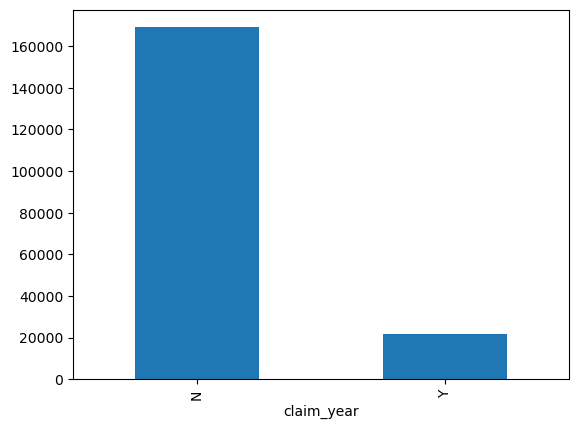

In [13]:
# Target Variable --

df['claim_year'].value_counts().plot.bar()
# 90 - 10 % ratioo-- extreme imbalance

# the class is heavily imbalanced , so lets do the class balancing technique after train-test split

## This is done in order to

    ### prevent data leakage
    ### oversampling technique is only applied to training data

In [14]:
# For categorical features

categorical_features = df.select_dtypes(include='object')

In [15]:
def Univariate_Analysis_for_Categorical_features():

    for feature in categorical_features:
        i = 221
        plt.figure(1)
        plt.subplot(i)
        sns.countplot(x=feature, data=df, palette='viridis')
        plt.title(f'Countplot for {feature}')
        plt.show()
        i += 1
    

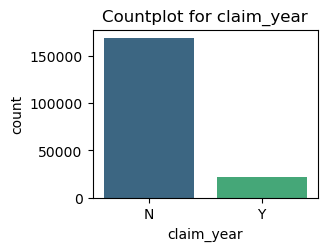

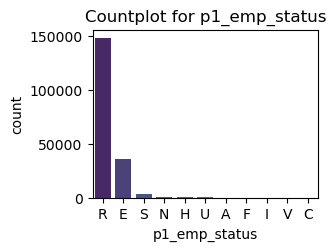

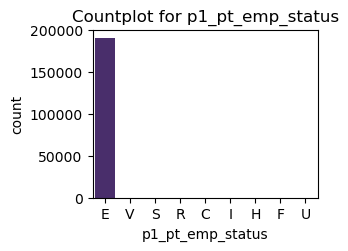

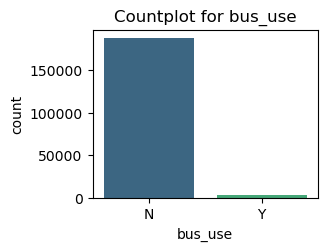

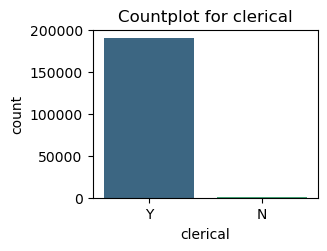

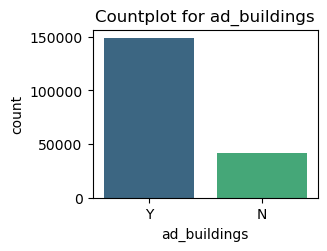

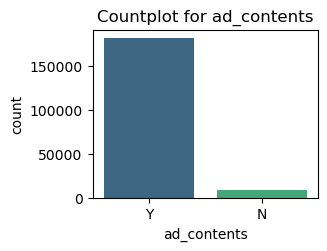

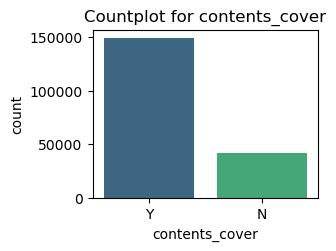

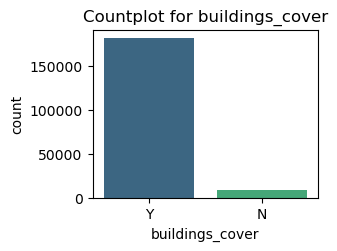

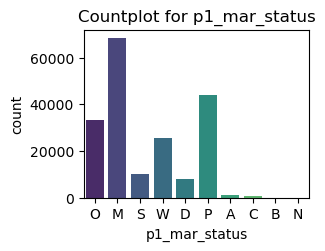

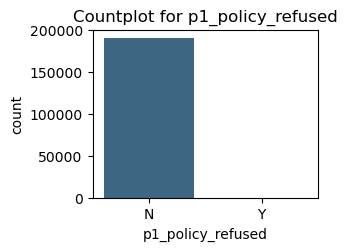

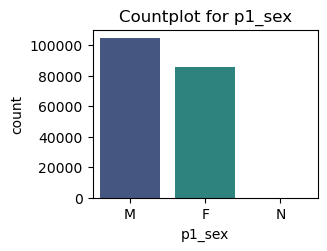

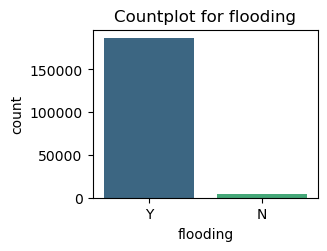

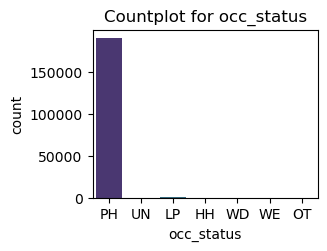

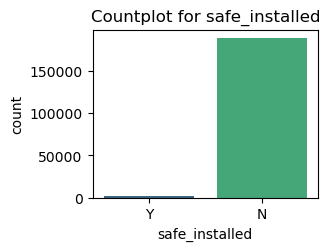

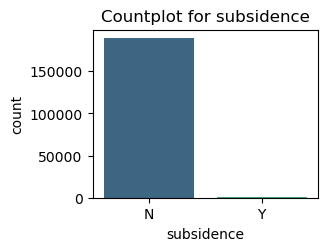

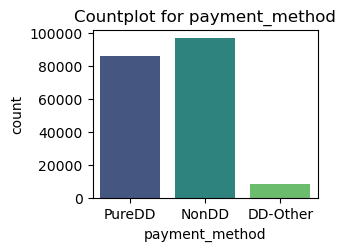

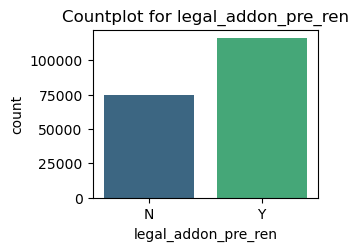

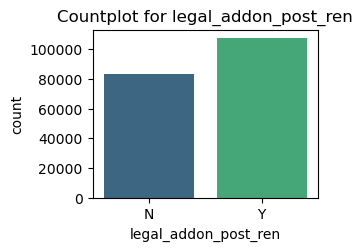

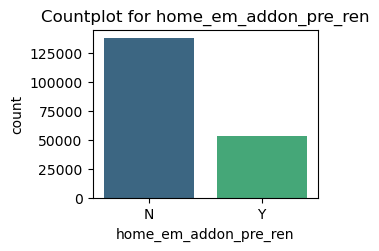

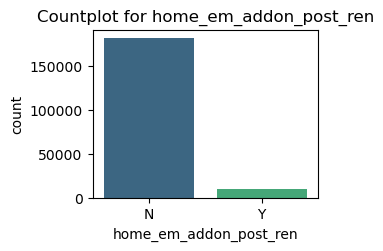

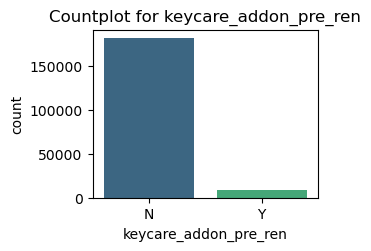

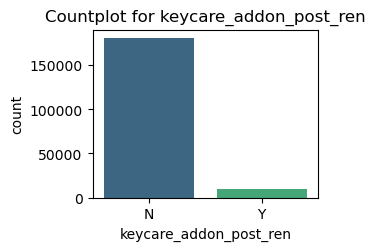

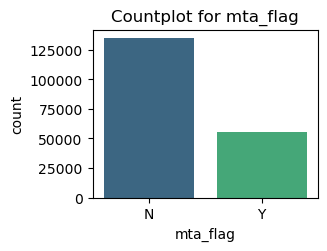

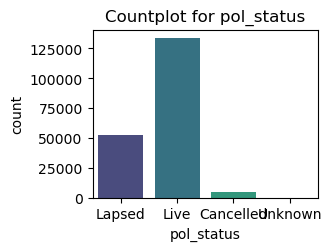

In [16]:
Univariate_Analysis_for_Categorical_features()

# Understandings/takeaways from  the above analysis

In [17]:
# PI_EMP_STATUS

    ## there are categories which we are not aware
    ## skip it for now, come back later to it and re analyse after getting the information
    
# PI_PT_EMP_STATUS

    ## there are categories which we are not aware
    ## skip it for now, come back later to it and re analyse after getting the information

# PI_MAR_STATUS

    ## there are categories which we are not aware
    ## skip it for now, come back later to it and re analyse after getting the information
    
# OCC_STATUS
    ## there are categories which we are not aware
    ## skip it for now, come back later to it and re analyse after getting the information
    
df = df.drop(['p1_emp_status'], axis=1)
df = df.drop(['p1_pt_emp_status'], axis=1)
df = df.drop(['p1_mar_status'], axis=1)
df = df.drop(['occ_status'], axis=1)

In [18]:

# dob - can be converted to age
# policy_number -- not needed as of now -- already removed
# mta_date - days from which the adjustment has been made ( quote_date/cover_start - mta_date)
# cover_start -- not needed as of now
# quote_date -- not needed as of now

# Calculating age of the client
df['p1_age'] = datetime.now().year - df['p1_dob'].dt.year
# Calculating the days when the mid term adjustment in policy has been made
### future reference---

In [19]:
# Now, dropping all these date columns

df = df.drop(['p1_dob'], axis=1)
df = df.drop(['mta_date'], axis=1)
df = df.drop(['cover_start'], axis=1)
df = df.drop(['quote_date'], axis=1)

In [113]:
# again, dropping this coz of lack of context
df = df.drop(['prop_type'], axis=1)

# Numerical Features


In [131]:
# For numerical features

numerical_features = df.select_dtypes(exclude='object')

In [123]:
numerical_features

# sum insured buildings
# sum insured contents
# bedrooms
# listed
# max_days_unocc
# paying_guests
# year built
# mta
# last_ann_prem_gross (not sure about this one..)

sum_insured_contents  bedrooms  listed  max_days_unocc  paying_guests  \
0                    50000.0         3    True               0          False   
1                    50000.0         3    True               0          False   
2                    50000.0         2    True               0          False   
3                    50000.0         2    True               0          False   
4                    50000.0         3    True               0          False   
...                      ...       ...     ...             ...            ...   
256131               50000.0         3    True               0          False   
256132               50000.0         3    True               0          False   
256133               50000.0         3    True               0          False   
256134                   0.0         5    True               0          False   
256135               50000.0         2    True               0          False   

        p1_age  house_age  
0           85       64.0  
1           54       64.0  
2           77       78.0  
3           99      154.0  
4           88       64.0  
...        ...        ...  
256131      87       44.0  
256132      96       44.0  
256133      79      124.0  
256134      87      124.0  
256135      75       78.0  

[191014 rows x 7 columns]

In [25]:

# due to lack of information --
## Note : this can be used in the future -- if required.

df = df.drop(['risk_rated_area_b'], axis=1)
df = df.drop(['risk_rated_area_c'], axis=1)
df = df.drop(['spec_sum_insured'], axis=1)
df = df.drop(['spec_item_prem'], axis=1)
df = df.drop(['roof_construction'], axis=1)
df = df.drop(['wall_construction'], axis=1)
df = df.drop(['ownership_type'], axis=1)
df = df.drop(['mta_fap'], axis=1)
df = df.drop(['mta_aprp'], axis=1)
df = df.drop(['last_ann_prem_gross'], axis=1)


In [69]:
df = df.drop(['sum_insured_buildings'], axis=1)

In [124]:
def Univariate_Analysis_for_Numerical_features():

    for feature in numerical_features:
        i = 131
        plt.figure(1)
        plt.subplot(i)
        trimmed_df[feature].plot.hist(figsize=(16,5))
        plt.subplot(132)
        trimmed_df[feature].plot.box(figsize=(16,5))
        plt.show()
        i += 1
    

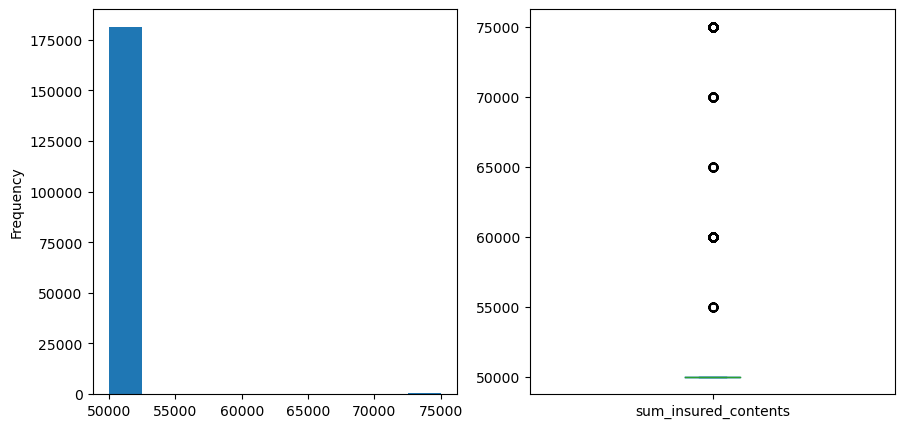

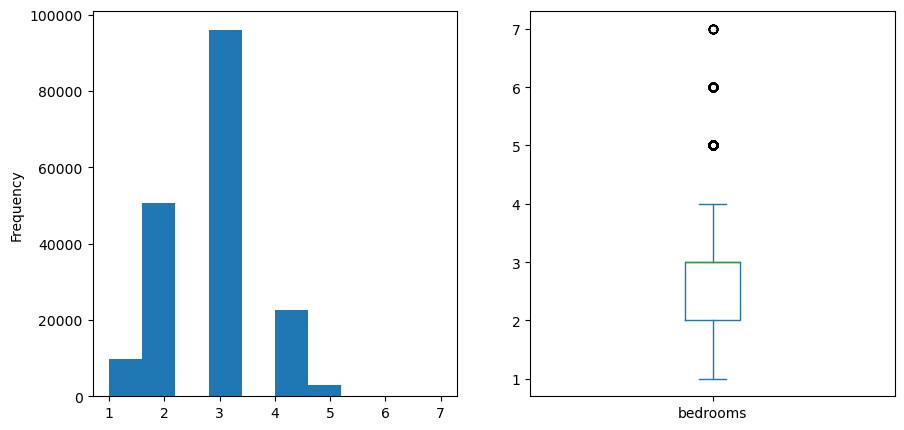

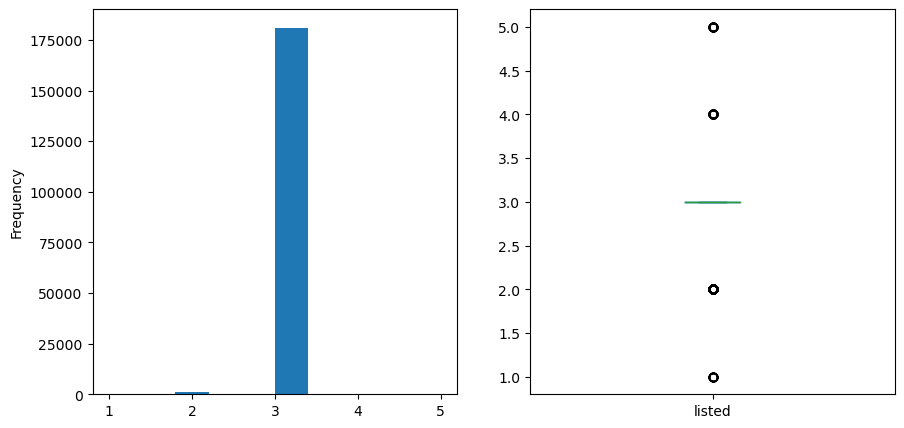

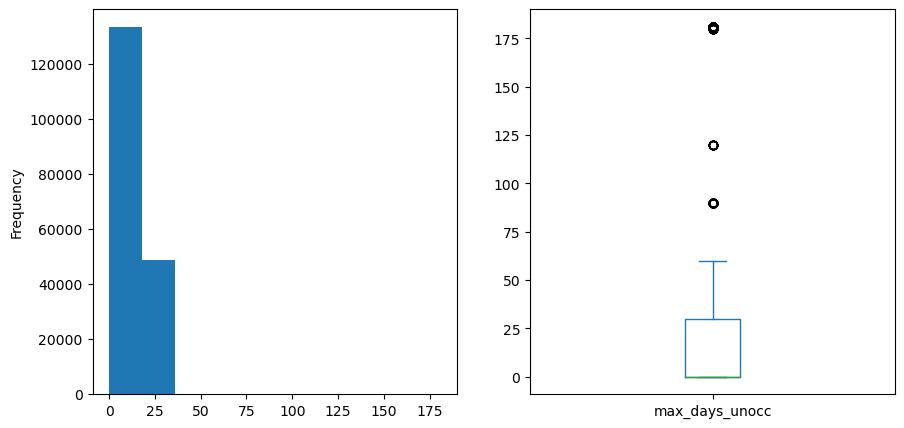

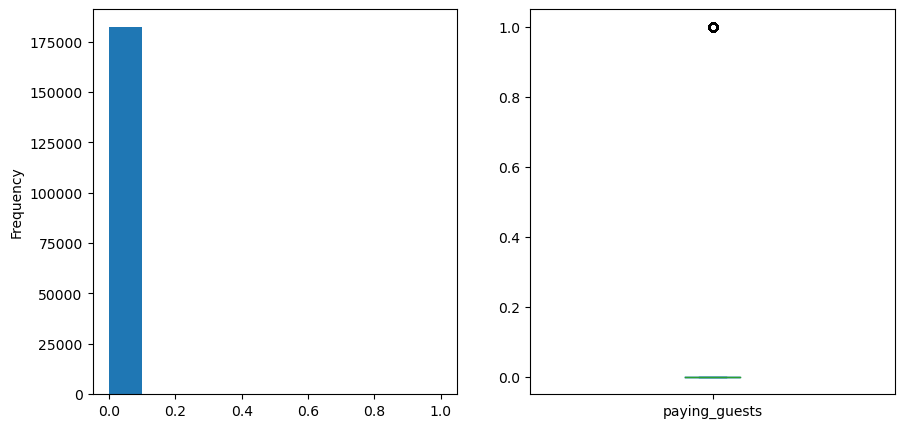

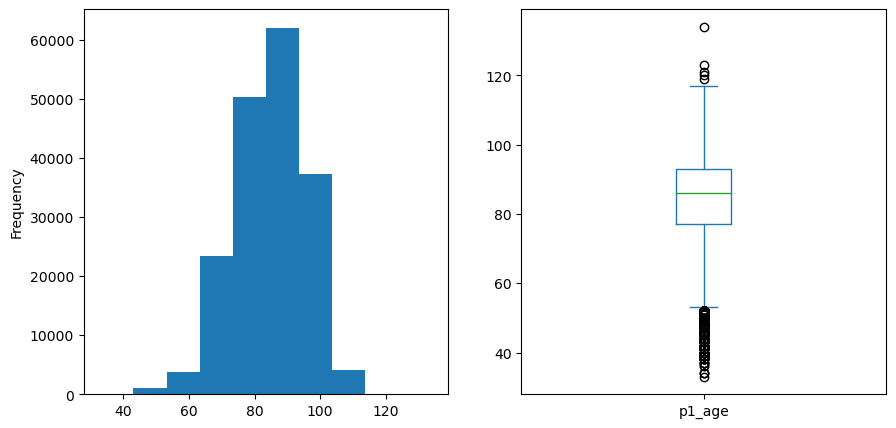

KeyError: 'house_age'

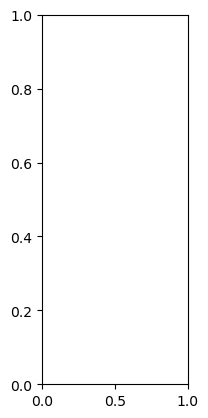

In [125]:
Univariate_Analysis_for_Numerical_features()


# sum

In [41]:
# Example: Calculate summary statistics
summary_stats = df['sum_insured_buildings'].describe()
print(summary_stats)


count     191014.000000
mean      780445.412378
std       413945.972002
min            0.000000
25%      1000000.000000
50%      1000000.000000
75%      1000000.000000
max      1000000.000000
Name: sum_insured_buildings, dtype: float64


In [47]:
# Example: Detect outliers using z-score
mean = df['sum_insured_buildings'].mean()
std_dev = df['sum_insured_buildings'].std()
threshold = 3
outliers = df[(df['sum_insured_buildings'] - mean).abs() > threshold * std_dev]
outliers

Empty DataFrame
Columns: [claim_year, bus_use, clerical, ad_buildings, sum_insured_buildings, ad_contents, sum_insured_contents, contents_cover, buildings_cover, p1_policy_refused, p1_sex, bedrooms, flooding, listed, max_days_unocc, paying_guests, prop_type, safe_installed, subsidence, yearbuilt, payment_method, legal_addon_pre_ren, legal_addon_post_ren, home_em_addon_pre_ren, home_em_addon_post_ren, keycare_addon_pre_ren, keycare_addon_post_ren, mta_flag, pol_status, p1_age]
Index: []

[0 rows x 30 columns]

In [48]:
df['sum_insured_buildings']

0         1000000.0
1         1000000.0
2               0.0
3               0.0
4         1000000.0
            ...    
256131    1000000.0
256132    1000000.0
256133    1000000.0
256134    1000000.0
256135    1000000.0
Name: sum_insured_buildings, Length: 191014, dtype: float64

In [60]:
# occurence of one value in particular
# 
df[df['sum_insured_buildings'] == 1000000.0].shape[0] # worst column in terms of data distribution
df[df['sum_insured_contents'] == 1000000.0].shape[0]


0

In [83]:
df['sum_insured_contents'].value_counts().head(15)

sum_insured_contents
50000.0     180984
0.0           8735
75000.0        671
60000.0        309
70000.0         98
100000.0        59
65000.0         54
55000.0         44
80000.0         40
85000.0         11
90000.0          9
Name: count, dtype: int64

In [68]:
df['sum_insured_buildings'].value_counts().head(5)

df['max_days_unocc'].value_counts().head(15)
df['paying_guests'].value_counts().head(15) # this can be converted into boolean value
df['prop_type'].value_counts().head(15)

prop_type
10.0    57223
2.0     32089
1.0     29776
19.0    28948
9.0     16224
18.0     6362
25.0     5924
7.0      5767
26.0     2535
48.0     1803
51.0      678
4.0       631
17.0      625
32.0      557
16.0      359
Name: count, dtype: int64

In [59]:
numerical_features

sum_insured_buildings  sum_insured_contents  bedrooms  listed  \
0                   1000000.0               50000.0       3.0     3.0   
1                   1000000.0               50000.0       3.0     3.0   
2                         0.0               50000.0       2.0     3.0   
3                         0.0               50000.0       2.0     3.0   
4                   1000000.0               50000.0       3.0     3.0   
...                       ...                   ...       ...     ...   
256131              1000000.0               50000.0       3.0     3.0   
256132              1000000.0               50000.0       3.0     3.0   
256133              1000000.0               50000.0       3.0     3.0   
256134              1000000.0                   0.0       5.0     3.0   
256135              1000000.0               50000.0       2.0     3.0   

        max_days_unocc  paying_guests  prop_type  yearbuilt  p1_age  
0                  0.0            0.0       10.0     1960.0      85  
1                  0.0            0.0        2.0     1960.0      54  
2                  0.0            0.0        9.0     1946.0      77  
3                  0.0            0.0       19.0     1870.0      99  
4                  0.0            0.0        1.0     1960.0      88  
...                ...            ...        ...        ...     ...  
256131             0.0            0.0        2.0     1980.0      87  
256132             0.0            0.0        1.0     1980.0      96  
256133             0.0            0.0       19.0     1900.0      79  
256134             0.0            0.0       19.0     1900.0      87  
256135             0.0            0.0        9.0     1946.0      75  

[191014 rows x 9 columns]

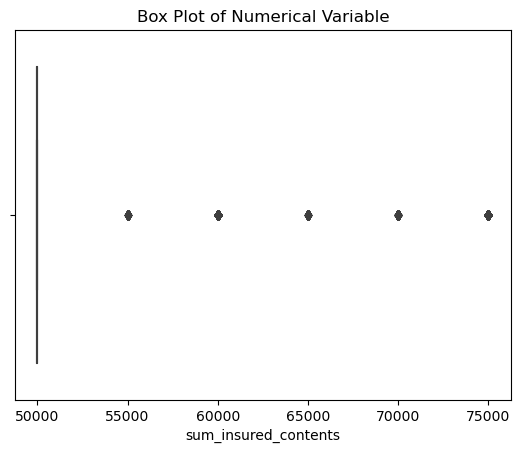

In [80]:
sns.boxplot(x=trimmed_df['sum_insured_contents'], data=df)
plt.title('Box Plot of Numerical Variable')
plt.show()

In [74]:
# Example: Calculate summary statistics
summary_stats = df['sum_insured_contents'].describe()
print(summary_stats)

count    191014.000000
mean      47858.795690
std       10652.623554
min           0.000000
25%       50000.000000
50%       50000.000000
75%       50000.000000
max      100000.000000
Name: sum_insured_contents, dtype: float64


In [76]:
# Example: Detect outliers using z-score
mean = df['sum_insured_contents'].mean()
std_dev = df['sum_insured_contents'].std()
threshold = 3
outliers = df[(df['sum_insured_contents'] - mean).abs() > threshold * std_dev]
outliers

claim_year bus_use clerical ad_buildings ad_contents  \
73              N       N        Y            Y           N   
106             N       N        Y            Y           N   
114             N       N        Y            Y           N   
211             N       N        Y            Y           N   
236             N       N        Y            Y           N   
...           ...     ...      ...          ...         ...   
256075          N       N        Y            Y           N   
256081          Y       N        Y            Y           N   
256092          N       N        Y            Y           N   
256104          Y       N        Y            Y           N   
256134          N       N        Y            Y           N   

        sum_insured_contents contents_cover buildings_cover p1_policy_refused  \
73                       0.0              Y               N                 N   
106                      0.0              Y               N                 N   
114                      0.0              Y               N                 N   
211                      0.0              Y               N                 N   
236                      0.0              Y               N                 N   
...                      ...            ...             ...               ...   
256075                   0.0              Y               N                 N   
256081                   0.0              Y               N                 N   
256092                   0.0              Y               N                 N   
256104                   0.0              Y               N                 N   
256134                   0.0              Y               N                 N   

       p1_sex  ...  payment_method legal_addon_pre_ren  legal_addon_post_ren  \
73          M  ...          PureDD                   Y                     Y   
106         M  ...           NonDD                   Y                     Y   
114         M  ...           NonDD                   N                     N   
211         M  ...           NonDD                   Y                     Y   
236         F  ...          PureDD                   Y                     Y   
...       ...  ...             ...                 ...                   ...   
256075      M  ...           NonDD                   N                     N   
256081      F  ...          PureDD                   Y                     Y   
256092      M  ...           NonDD                   N                     N   
256104      F  ...           NonDD                   Y                     Y   
256134      M  ...        DD-Other                   Y                     N   

        home_em_addon_pre_ren  home_em_addon_post_ren  keycare_addon_pre_ren  \
73                          Y                       N                      N   
106                         N                       N                      N   
114                         N                       N                      N   
211                         N                       N                      N   
236                         N                       N                      N   
...                       ...                     ...                    ...   
256075                      N                       N                      N   
256081                      N                       N                      N   
256092                      N                       N                      N   
256104                      N                       N                      N   
256134                      N                       N                      N   

       keycare_addon_post_ren mta_flag  pol_status p1_age  
73                          N        Y        Live     91  
106                         N        Y      Lapsed     79  
114                         N        N      Lapsed     85  
211                         N        Y      Lapsed     86  
236                         N        Y        Live     

In [77]:
# Example: Remove outliers beyond 3 standard deviations from the mean
trimmed_df = df[(df['sum_insured_contents'] - mean).abs() <= threshold * std_dev]

In [78]:
trimmed_df

claim_year bus_use clerical ad_buildings ad_contents  \
0               N       N        Y            Y           Y   
1               N       Y        N            Y           Y   
2               N       N        Y            N           Y   
3               N       N        Y            N           Y   
4               N       N        Y            Y           Y   
...           ...     ...      ...          ...         ...   
256130          N       N        Y            N           Y   
256131          Y       N        Y            Y           Y   
256132          N       N        Y            Y           Y   
256133          N       N        Y            Y           Y   
256135          N       N        Y            Y           Y   

        sum_insured_contents contents_cover buildings_cover p1_policy_refused  \
0                    50000.0              Y               Y                 N   
1                    50000.0              Y               Y                 N   
2                    50000.0              N               Y                 N   
3                    50000.0              N               Y                 N   
4                    50000.0              Y               Y                 N   
...                      ...            ...             ...               ...   
256130               50000.0              N               Y                 N   
256131               50000.0              Y               Y                 N   
256132               50000.0              Y               Y                 N   
256133               50000.0              Y               Y                 N   
256135               50000.0              Y               Y                 N   

       p1_sex  ...  payment_method legal_addon_pre_ren  legal_addon_post_ren  \
0           M  ...          PureDD                   N                     N   
1           M  ...          PureDD                   Y                     Y   
2           M  ...          PureDD                   Y                     Y   
3           F  ...           NonDD                   N                     N   
4           M  ...        DD-Other                   Y                     Y   
...       ...  ...             ...                 ...                   ...   
256130      F  ...           NonDD                   Y                     Y   
256131      F  ...          PureDD                   Y                     N   
256132      M  ...           NonDD                   Y                     Y   
256133      M  ...          PureDD                   Y                     Y   
256135      M  ...          PureDD                   N                     N   

        home_em_addon_pre_ren  home_em_addon_post_ren  keycare_addon_pre_ren  \
0                           N                       N                      N   
1                           N                       N                      N   
2                           N                       N                      N   
3                           N                       N                      N   
4                           N                       N                      N   
...                       ...                     ...                    ...   
256130                      Y                       N                      N   
256131                      N                       N                      N   
256132                      N                       N                      N   
256133                      N                       N                      N   
256135                      N                       N                      N   

       keycare_addon_post_ren mta_flag  pol_status p1_age  
0                           N        N      Lapsed     85  
1                           N        Y        Live     54  
2                           N        Y        Live     77  
3                           N        N        Live     99  
4                           N        N        Live     

In [85]:
numerical_features

sum_insured_contents  bedrooms  listed  max_days_unocc  paying_guests  \
0                    50000.0       3.0     3.0             0.0            0.0   
1                    50000.0       3.0     3.0             0.0            0.0   
2                    50000.0       2.0     3.0             0.0            0.0   
3                    50000.0       2.0     3.0             0.0            0.0   
4                    50000.0       3.0     3.0             0.0            0.0   
...                      ...       ...     ...             ...            ...   
256131               50000.0       3.0     3.0             0.0            0.0   
256132               50000.0       3.0     3.0             0.0            0.0   
256133               50000.0       3.0     3.0             0.0            0.0   
256134                   0.0       5.0     3.0             0.0            0.0   
256135               50000.0       2.0     3.0             0.0            0.0   

        prop_type  yearbuilt  p1_age  
0            10.0     1960.0      85  
1             2.0     1960.0      54  
2             9.0     1946.0      77  
3            19.0     1870.0      99  
4             1.0     1960.0      88  
...           ...        ...     ...  
256131        2.0     1980.0      87  
256132        1.0     1980.0      96  
256133       19.0     1900.0      79  
256134       19.0     1900.0      87  
256135        9.0     1946.0      75  

[191014 rows x 8 columns]

In [107]:
# sort out numerical features first

## float -> int
# bedrooms
# max_days_unocc

## change to bool
# paying guests
# listed

In [102]:

#df['paying_guests'].value_counts().head(5)

df['listed'].value_counts().head(5)

listed
True     189926
False      1088
Name: count, dtype: int64

In [112]:
df['max_days_unocc'].value_counts().head(5)

max_days_unocc
0      139436
30      51171
181       299
90         70
180        20
Name: count, dtype: int64

# Convert columns to booleans (wherever necessary)

In [94]:
# converting paying guests
df['paying_guests'] = df['paying_guests'].astype(bool)

In [99]:
# converting listed column

specific_value = 3  # Replace 'some_value' with the value you want to consider as True

df['listed'] = df['listed'] == specific_value

In [101]:
# In case of selecting multiple values to be true, in that case, we can use below

#values_to_consider_true = ['value1', 'value2', 'value3']  # List of values to consider as True

#df['listed'] = df['listed'].isin(values_to_consider_true)

# convert to respective datatypes (should have noted in the start ) float -> int

In [108]:
# converting bedrooms column
df['bedrooms'] = df['bedrooms'].astype(int)

In [109]:
# converting max days unoccupied

# converting paying guests
df['max_days_unocc'] = df['max_days_unocc'].astype(int)

# Adding new column to depict age of the house

In [119]:
import datetime
current_year = datetime.datetime.now().year
df['house_age'] = current_year - df['yearbuilt']

In [127]:
df['house_age'] = df['house_age'].astype(int)

In [120]:
# dropping the year built column

df = df.drop(['yearbuilt'], axis=1)

# check, if any columns does not provide any significance in terms of data distributions

In [ ]:
# removing 
df = df.drop(['yearbuilt'], axis=1)

# Removing any other features, if necessary

# Treat outliers

In [128]:
df

claim_year bus_use clerical ad_buildings ad_contents  \
0               N       N        Y            Y           Y   
1               N       Y        N            Y           Y   
2               N       N        Y            N           Y   
3               N       N        Y            N           Y   
4               N       N        Y            Y           Y   
...           ...     ...      ...          ...         ...   
256131          Y       N        Y            Y           Y   
256132          N       N        Y            Y           Y   
256133          N       N        Y            Y           Y   
256134          N       N        Y            Y           N   
256135          N       N        Y            Y           Y   

        sum_insured_contents contents_cover buildings_cover p1_policy_refused  \
0                    50000.0              Y               Y                 N   
1                    50000.0              Y               Y                 N   
2                    50000.0              N               Y                 N   
3                    50000.0              N               Y                 N   
4                    50000.0              Y               Y                 N   
...                      ...            ...             ...               ...   
256131               50000.0              Y               Y                 N   
256132               50000.0              Y               Y                 N   
256133               50000.0              Y               Y                 N   
256134                   0.0              Y               N                 N   
256135               50000.0              Y               Y                 N   

       p1_sex  ...  legal_addon_pre_ren legal_addon_post_ren  \
0           M  ...                    N                    N   
1           M  ...                    Y                    Y   
2           M  ...                    Y                    Y   
3           F  ...                    N                    N   
4           M  ...                    Y                    Y   
...       ...  ...                  ...                  ...   
256131      F  ...                    Y                    N   
256132      M  ...                    Y                    Y   
256133      M  ...                    Y                    Y   
256134      M  ...                    Y                    N   
256135      M  ...                    N                    N   

        home_em_addon_pre_ren  home_em_addon_post_ren  keycare_addon_pre_ren  \
0                           N                       N                      N   
1                           N                       N                      N   
2                           N                       N                      N   
3                           N                       N                      N   
4                           N                       N                      N   
...                       ...                     ...                    ...   
256131                      N                       N                      N   
256132                      N                       N                      N   
256133                      N                       N                      N   
256134                      N                       N                      N   
256135                      N                       N                      N   

       keycare_addon_post_ren mta_flag pol_status p1_age house_age  
0                           N        N     Lapsed     85        64  
1                           N        Y       Live     54        64  
2                           N        Y       Live     77        78  
3                           N        N       Live     99       154  
4                           N        N       Live     88        64  
...                       ...      ...        ...    ...       ...  
256131                      N        N     Lapsed     87        

In [129]:
categorical_features

claim_year p1_emp_status p1_pt_emp_status bus_use clerical  \
0               N             R                E       N        Y   
1               N             E                E       Y        N   
2               N             E                E       N        Y   
3               N             R                E       N        Y   
4               N             R                E       N        Y   
...           ...           ...              ...     ...      ...   
256131          Y             R                E       N        Y   
256132          N             R                E       N        Y   
256133          N             R                E       N        Y   
256134          N             R                E       N        Y   
256135          N             R                E       N        Y   

       ad_buildings ad_contents contents_cover buildings_cover p1_mar_status  \
0                 Y           Y              Y               Y             O   
1                 Y           Y              Y               Y             M   
2                 N           Y              N               Y             S   
3                 N           Y              N               Y             W   
4                 Y           Y              Y               Y             M   
...             ...         ...            ...             ...           ...   
256131            Y           Y              Y               Y             O   
256132            Y           Y              Y               Y             M   
256133            Y           Y              Y               Y             O   
256134            Y           N              Y               N             O   
256135            Y           Y              Y               Y             P   

        ... subsidence payment_method legal_addon_pre_ren  \
0       ...          N         PureDD                   N   
1       ...          N         PureDD                   Y   
2       ...          N         PureDD                   Y   
3       ...          N          NonDD                   N   
4       ...          N       DD-Other                   Y   
...     ...        ...            ...                 ...   
256131  ...          N         PureDD                   Y   
256132  ...          N          NonDD                   Y   
256133  ...          N         PureDD                   Y   
256134  ...          N       DD-Other                   Y   
256135  ...          N         PureDD                   N   

       legal_addon_post_ren home_em_addon_pre_ren home_em_addon_post_ren  \
0                         N                     N                      N   
1                         Y                     N                      N   
2                         Y                     N                      N   
3                         N                     N                      N   
4                         Y                     N                      N   
...                     ...                   ...                    ...   
256131                    N                     N                      N   
256132                    Y                     N                      N   
256133                    Y                     N                      N   
256134                    N                     N                      N   
256135                    N                     N                      N   

       keycare_addon_pre_ren keycare_addon_post_ren mta_flag pol_status  
0                          N                      N        N     Lapsed  
1                          N                      N        Y       Live  
2                          N                      N        Y       Live  
3                          N                      N        N       Live  
4                          N                      N        N       Live  
...                      ...                    ...      ...        ...  
256131                     N                      N  

In [132]:
numerical_features

sum_insured_contents  bedrooms  listed  max_days_unocc  paying_guests  \
0                    50000.0         3    True               0          False   
1                    50000.0         3    True               0          False   
2                    50000.0         2    True               0          False   
3                    50000.0         2    True               0          False   
4                    50000.0         3    True               0          False   
...                      ...       ...     ...             ...            ...   
256131               50000.0         3    True               0          False   
256132               50000.0         3    True               0          False   
256133               50000.0         3    True               0          False   
256134                   0.0         5    True               0          False   
256135               50000.0         2    True               0          False   

        p1_age  house_age  
0           85         64  
1           54         64  
2           77         78  
3           99        154  
4           88         64  
...        ...        ...  
256131      87         44  
256132      96         44  
256133      79        124  
256134      87        124  
256135      75         78  

[191014 rows x 7 columns]